In [1]:
# Apply machine learning to temperature data
# Predict how temperatures will change in the future

# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
temperature_data = pd.read_csv("clean_data/annual_mean_by_country.csv")
temp_data = pd.DataFrame(temperature_data)
temp_data.head()

,Unnamed: 0,Year,Afghanistan,Africa,Albania,Algeria,American Samoa,Americas,Andorra,Angola,...,Wallis and Futuna Islands,Western Africa,Western Asia,Western Europe,Western Sahara,World,Yemen,Yugoslav SFR,Zambia,Zimbabwe
0,0,1965,0.010000,-0.194667,-0.348833,-0.031917,-0.388500,-0.167583,-0.269250,-0.139833,...,-0.344833,-0.331667,-0.026833,-0.528750,-0.281417,-0.148167,-0.554583,-0.444583,-0.345833,-0.244083
1,1,1966,0.241417,0.150250,0.422583,0.285750,0.115000,-0.139750,0.355833,0.206750,...,0.006667,0.111500,0.744000,0.378167,0.267917,0.159000,0.062000,0.556750,0.290833,0.165333
2,2,1967,-0.362667,-0.228167,-0.076083,-0.093000,-0.360083,-0.056000,0.357333,-0.114667,...,-0.230167,-0.281000,-0.734417,0.476250,-0.079917,-0.113500,-0.235083,0.171500,-0.081917,-0.121333
3,3,1968,-0.339417,-0.166583,0.056417,0.086750,-0.137583,-0.090250,0.198083,-0.160333,...,-0.095333,-0.063667,-0.198083,-0.011083,-0.141417,-0.108750,-0.151167,0.144667,-0.128417,0.089250
4,4,1969,-0.330667,0.348833,-0.043417,0.150083,0.086250,0.278250,-0.363667,0.207500,...,-0.233833,0.540917,0.345000,-0.216750,0.250917,-0.044500,0.183250,-0.288750,0.240583,0.101917


In [3]:
temp = temp_data.drop(columns="Unnamed: 0")
temp.head()

,Year,Afghanistan,Africa,Albania,Algeria,American Samoa,Americas,Andorra,Angola,Anguilla,...,Wallis and Futuna Islands,Western Africa,Western Asia,Western Europe,Western Sahara,World,Yemen,Yugoslav SFR,Zambia,Zimbabwe
0,1965,0.010000,-0.194667,-0.348833,-0.031917,-0.388500,-0.167583,-0.269250,-0.139833,-0.235833,...,-0.344833,-0.331667,-0.026833,-0.528750,-0.281417,-0.148167,-0.554583,-0.444583,-0.345833,-0.244083
1,1966,0.241417,0.150250,0.422583,0.285750,0.115000,-0.139750,0.355833,0.206750,-0.009333,...,0.006667,0.111500,0.744000,0.378167,0.267917,0.159000,0.062000,0.556750,0.290833,0.165333
2,1967,-0.362667,-0.228167,-0.076083,-0.093000,-0.360083,-0.056000,0.357333,-0.114667,-0.294750,...,-0.230167,-0.281000,-0.734417,0.476250,-0.079917,-0.113500,-0.235083,0.171500,-0.081917,-0.121333
3,1968,-0.339417,-0.166583,0.056417,0.086750,-0.137583,-0.090250,0.198083,-0.160333,-0.187500,...,-0.095333,-0.063667,-0.198083,-0.011083,-0.141417,-0.108750,-0.151167,0.144667,-0.128417,0.089250
4,1969,-0.330667,0.348833,-0.043417,0.150083,0.086250,0.278250,-0.363667,0.207500,0.270250,...,-0.233833,0.540917,0.345000,-0.216750,0.250917,-0.044500,0.183250,-0.288750,0.240583,0.101917


## Loop through all countries

In [6]:
# Get all country names
countries = []
for col in temp.columns:
    print(col)
    countries.append(col)
    

Year
Afghanistan
Africa
Albania
Algeria
American Samoa
Americas
Andorra
Angola
Anguilla
Annex I countries
Antarctica
Antigua and Barbuda
Argentina
Armenia
Aruba
Asia
Australia
Australia and New Zealand
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belgium-Luxembourg
Belize
Benin
Bhutan
Bolivia (Plurinational State of)
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Caribbean
Cayman Islands
Central African Republic
Central America
Central Asia
Chad
Channel Islands
Chile
China
China, Hong Kong SAR
China, Macao SAR
China, Taiwan Province of
China, mainland
Christmas Island
Cocos (Keeling) Islands
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Croatia
Cuba
Cyprus
Czechia
Czechoslovakia
Côte d'Ivoire
Democratic People's Republic of Korea
Democratic Republic of the Congo
Denmark
Djibouti
Dominica
Dominican Republic
Eastern Africa
Eastern Asia
Eastern Europe
Ecuador
Egypt

## Afghanistan Test

In [58]:
X = temp.Year.values.reshape(-1, 1)
y = temp.Afghanistan.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (55, 1) (55, 1)


array([[1965],
       [1966],
       [1967],
       [1968],
       [1969],
       [1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019]], dtype=int64)

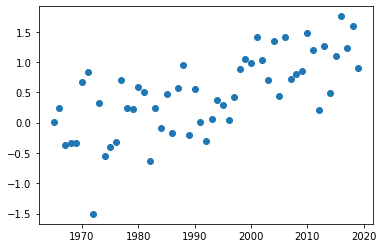

In [23]:
plt.scatter(X, y)

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [25]:
# Fit the model to the data
model.fit(X, y)

LinearRegression()

In [26]:
# Print the coefficient and the intercept for the model
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.02793726]]
y-axis intercept:  [-55.1788088]


In [27]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1965]]
Max X Value: [[2019]]


In [28]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
y_min = model.predict(x_min)
y_max = model.predict(x_max)

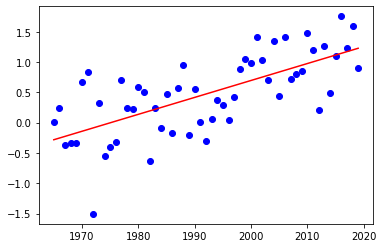

In [29]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [30]:
# Predict anual temperature change in 2030
y_2030 = model.predict([[2030]])
y_2030

array([[1.53382798]])

## World test

In [71]:
X = temp.Year.values.reshape(-1, 1)
y = temp.World.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (55, 1) (55, 1)


array([[1965],
       [1966],
       [1967],
       [1968],
       [1969],
       [1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019]], dtype=int64)

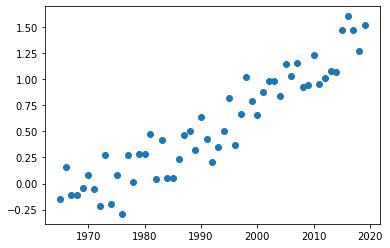

In [72]:
plt.scatter(X, y)

In [73]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [74]:
# Fit the model to the data
model.fit(X, y)

LinearRegression()

In [75]:
# Print the coefficient and the intercept for the model
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.02986112]]
y-axis intercept:  [-58.92054971]


In [76]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1965]]
Max X Value: [[2019]]


In [77]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
y_min = model.predict(x_min)
y_max = model.predict(x_max)

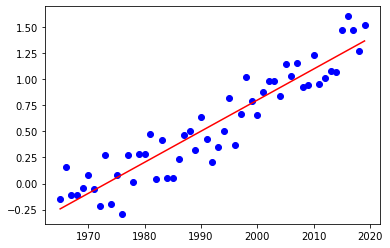

In [78]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [79]:
# Predict anual temperature change in 2030
y_2030 = model.predict([[2030]])
y_2030

array([[1.69753025]])

AttributeError: 'DataFrame' object has no attribute 'country'